In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# rock, paper, scissors
num_actions = 3

regret_sum = np.array([0.0, 0.0, 0.0])
strategy = np.array([0.0, 0.0, 0.0])
strategy_sum = np.array([0.0, 0.0, 0.0])
opp_strategy = np.array([0.4, 0.3, 0.3])

def utility(p1, p2):
    payoff = [
        [0, -1, 1],
        [1, 0, -1],
        [-1, 1, 0]]
    return payoff[p1][p2]

In [3]:
def get_strategy():
    """
    get current (mixed) strategy via regret-matching
    """
    global strategy_sum
    strategy = np.maximum(regret_sum, 0)
    normalizing_sum = np.sum(strategy)
    for i in range(num_actions):
        if normalizing_sum > 0:
            strategy[i] /= normalizing_sum
        else:
            strategy[i] = 1.0 / num_actions
    strategy_sum += strategy
    return strategy

get_strategy()

array([0.33333333, 0.33333333, 0.33333333])

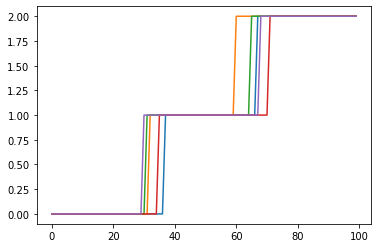

In [4]:
def get_action(strategy):
    """
    choose an action randomly using weights in strategy
    """
    prob = np.random.random()
    cumulative_prob = 0
    for idx in range(num_actions):
        cumulative_prob += strategy[idx]
        if prob < cumulative_prob:
            return idx

for j in range(5):
    a = [get_action(get_strategy()) for i in range(100)]
    plt.plot(sorted(a))
plt.show()

([<matplotlib.lines.Line2D at 0x7f371d1b44a8>], 9.05)

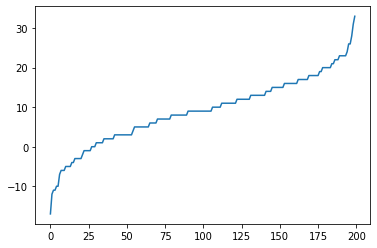

In [5]:
games = []
for j in range(200):
    total_utility = 0
    for i in range(100):
        # strategy = get_strategy()
        strategy = np.array([0, 1, 0]) # always play paper
        action = get_action(strategy)
        opp_action = get_action(opp_strategy)
        total_utility += utility(action, opp_action)
    games.append(total_utility)

plt.plot(sorted(games)), np.mean(games)

In [6]:
# play and learn strategies
def train(iterations):
    global regret_sum
    action_utility = np.zeros(num_actions)
    for i in range(iterations):
        # get regret-matched strategy actions
        strategy = get_strategy()
        action = get_action(strategy)
        opp_action = get_action(opp_strategy)
        # compute action utilities
        for a in range(num_actions):
            action_utility[a] = utility(a, opp_action)
        # accumulate action regrets
        for a in range(num_actions):
            regret_sum[a] += action_utility[a] - action_utility[action]
        
def get_average_strategy():
    avg_strategy = np.zeros(num_actions)
    normalizing_sum = np.sum(strategy_sum)
    for i in range(num_actions):
        if normalizing_sum > 0:
            avg_strategy[i] = strategy_sum[i] / normalizing_sum
        else:
            avg_strategy[i] = 1.0 / num_actions
    return avg_strategy

train(100000)
get_average_strategy() # this should pretty much tell us to always play paper

array([0.00322787, 0.99508889, 0.00168323])